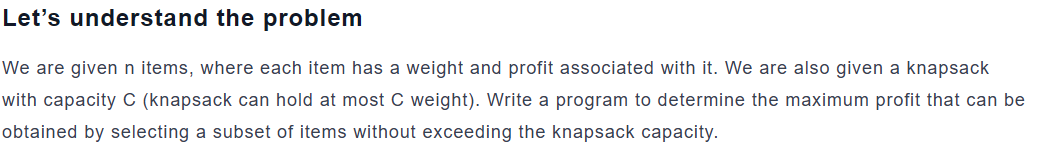

# efficient approach by memoisation
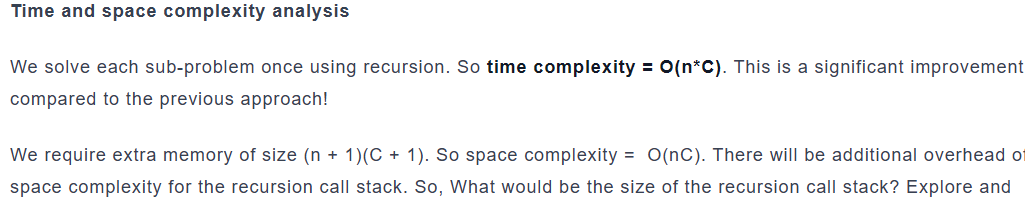

We initialize a 2D table dp[][] of size (n + 1) * (C + 1) and set all values to -1. We use this table to store the
solutions of the sub-problems. The critical question is: Why (n + 1) * (C + 1)? During recursion, input size n and C
decrease by at least 1 until they reach 0. So there can be (n + 1) * (C + 1) possible sub-problems, and we need to
allocate an entry for each one of them.

Now, we call a helper function knapsack(P[], W[], i, C, dp), where the initial value of i is n.

1. Base case: If i == 0 or C == 0, we return 0 as the maximum profit. If the base case is false, we check if the
solution for the current state (dp[i][C]) is already computed or not.

2. If dp[i][C] < 0, result is not yet computed. So, we proceed with the recursive calculation.

. We calculate the profit by including the ith item if C >= W[i-1] i.e. profitInclude = P[i - 1] + knapsack(P, W, i
- 1, C - W[i - 1], dp).

. We calculate the profit by excluding the ith item i.e. profitExclude = knapsack(P, W, i - 1, C, dp).

. We store the maximum profit i.e. dp[i][C] = max (profitInclude, profitExclude).

3. If dp[i][C] > 0, it means the result has already been calculated and stored in dp[i][C]. So there is no need to do
the calculation again so we will directly return the value stored at dolilL

In [ ]:
def knapsack(P, W, i, C, dp):
    if i == 0 or C == 0:

        return 0

    if dp[i][c] < 0:

        profitInclude = 0
        if C >= W[i - 1]:
            profitInclude = P[i - 1] + knapsack(P, W, i - 1, C - W[i - 1], dp)

        profitExclude = knapsack(P, W, i - 1, C, dp)
        dp[i] [C] = max(profitInclude, profitExclude)

    return dp[i][c]

def zeroOneKnapSack(P, W, n, C):
    dp = [[-1] * (C + 1) for _in range(n + 1)]

    result = knapsack(P, W, n, C, dp)
    return result

# Efficient approach using bottom-approach of DP
- We start by solving subproblems with smaller sizes (0 items and 0 capacity). Then, we build the solution iteratively for larger subproblems using the previously solved smaller subproblems until we find the solution to the given problem (n items and C capacity). During this process, we use additional memory to store the solution of each subproblem.
1.  We define a 2D table  to store the solution for each possible subproblem. 
- we set the value 0 in the first row and the first column of the table.
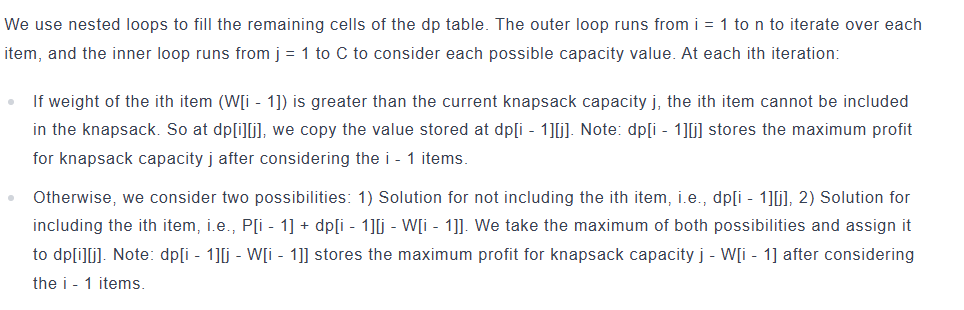


Time and space complexity analysis

We use two separate loops for initialization and one nested loop for storing results in the table. During each iteration
f the loop, we perform constant operations. So time complexity = O(n) + O(C) + O(n*C) = O(n*C). We use an extra
D table of size (n + 1)*(C + 1), so space complexity = O(n*C).

In [ ]:
def knapsack(P, W, n, C):
    dp = [[0] * (C + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for j in range(1, C + 1):
            if W[i - 1] > j:
                dp[i][j] = dp[i - 1][j]
            else:

                dp[i][j] = max(P[i - 1] + dp[i - 1][j - W[i - 1]], dp[i - 1] [j])

    return dp[n] [c]    

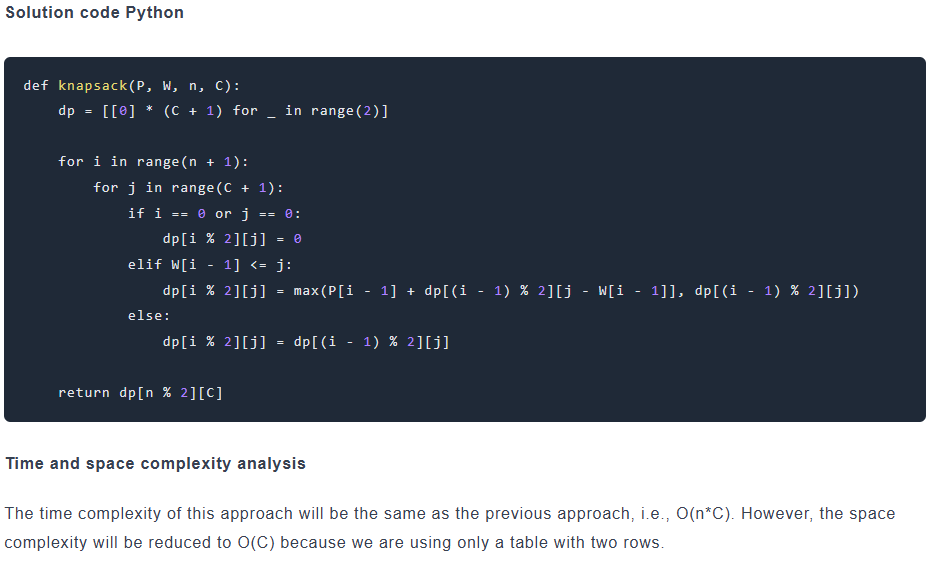

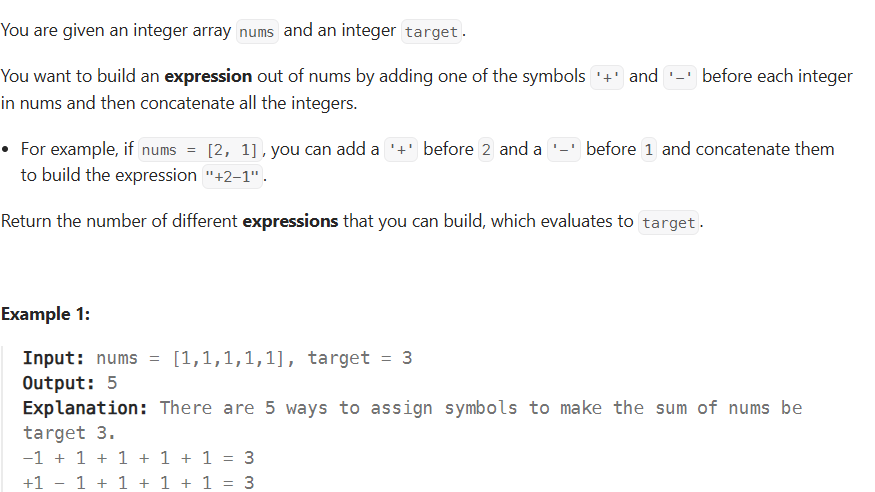



+1 + 1 - 1 + 1 + 1 = 3]

+1 + 1 + 1 - 1 + 1 = 3

+1 + 1 + 1 + 1 - 1 = 3




You're given:

* A list of integers `nums`
* A `target` integer

You need to:

* Put either a `+` or `-` sign in front of **every** number in `nums`
* Evaluate the resulting expression
* **Count how many such combinations** give you the result equal to `target`

---

### 🧠 **Example Clarification**

For `nums = [1, 1, 1, 1, 1]`, `target = 3`

Possible expressions that evaluate to 3:

1. `-1 +1 +1 +1 +1 = 3`
2. `+1 -1 +1 +1 +1 = 3`
3. `+1 +1 -1 +1 +1 = 3`
4. `+1 +1 +1 -1 +1 = 3`
5. `+1 +1 +1 +1 -1 = 3`

**So output is `5`.**

---

### 🚀 How to Think About the Problem

This is a variation of the **Subset Sum / 0-1 Knapsack** problem.

Imagine instead of adding `+/-`, we are **partitioning** the array into two subsets:

* One subset contributes **positively (+)**
* The other contributes **negatively (-)**

Let’s say:

* `P = sum of elements with '+'`
* `N = sum of elements with '-'`

Then, we can form:

```
P - N = target
```

We also know:

```
P + N = total_sum (say S)
```

Add these two equations:

```
(P - N) + (P + N) = target + S
=> 2P = target + S
=> P = (target + S) / 2
```

So your task becomes:

> Count the number of subsets with **sum = (target + sum(nums)) / 2**

This is a classic **subset sum count** problem.

---

### ⚠️ Edge Case Handling

We must check:

* If `(S + target)` is odd → it's not divisible by 2 → return 0
* If `target > S` → not possible → return 0

---

### 📌 Step-by-Step Approach to Similar Problems

1. **Understand** what is being asked (count combinations of `+` and `-`)
2. **Translate** it into a known problem (Subset sum count)
3. **Check edge cases** like sum not being valid
4. **Use dynamic programming** (either top-down with memoization or bottom-up tabulation)
5. **Optimize for space** if needed

---

### ✅ Code Explanation

```python
def findTargetSumWays(self, nums: List[int], target: int) -> int:
    s = sum(nums)  # total sum of array

    # Check if we can partition the array to achieve the target
    if s < target or (s - target) % 2 != 0:
        return 0

    n = (s - target) // 2  # equivalent subset sum to find

    dp = [0] * (n + 1)
    dp[0] = 1  # base case: there's 1 way to get sum 0 (by choosing nothing)

    for v in nums:
        for j in range(n, v - 1, -1):
            dp[j] += dp[j - v]  # include this number to form sum j

    return dp[-1]  # number of ways to get the required subset sum
```

---

### 🧠 Why `dp[n]`?

`dp[i]` represents:

> Number of ways to reach sum `i` using elements from `nums`

We're filling it in such a way that each value only contributes once (like 0-1 knapsack).

---

### 📘 Summary

| Concept      | Explanation                                        |
| ------------ | -------------------------------------------------- |
| Problem Type | Subset Sum Count                                   |
| Technique    | Dynamic Programming (Tabulation)                   |
| DP Array     | `dp[i] = number of ways to make sum i`             |
| Trick        | Convert `target` to subset sum: `(S - target) / 2` |
| Edge Cases   | Negative or non-integer values → return 0          |

